In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from predictions import evaluate, predict_k

In [2]:
from data import get_images
from config import IMG_SIZE

DATASET_DIR = os.path.join('..', '..', 'data', 'merged', 'head', 'boosted')
with open("../../data/classes_direction.txt") as file:
    classes = [line.strip() for line in file]

X_train, y_train = get_images(os.path.join(DATASET_DIR, "train"), classes, IMG_SIZE)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = tf.keras.applications.inception_v3.preprocess_input(X_train)

X_test, y_test = get_images(os.path.join(DATASET_DIR, "test"), classes, IMG_SIZE)
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = tf.keras.applications.inception_v3.preprocess_input(X_test)

..\..\data\merged\head\boosted\train\*.jpg
..\..\data\merged\head\boosted\test\*.jpg


In [3]:
drop_indices = []
# Set y to -1 if record does not exist in the training set
for i, y_test_i in enumerate(y_test):
    if y_test_i not in y_train:
        y_test[i] = -1
        drop_indices.append(i)

print("{} dropped".format(len(drop_indices)))

# Remove new observations from dataset
X_test = np.delete(X_test, drop_indices, axis=0)
y_test = np.delete(y_test, drop_indices, axis=0)

32 dropped


In [4]:
import models
from data import get_embeddings
from config import DESCRIPTOR_SIZE

def load_estimator(path):

    # Load model
    model = models.triplet_network_ohnm
    model.load_weights(path)

    # Stores support set embeddings into a dataframe
    X_embeddings, y_embeddings = get_embeddings(model, X_train, y_train)
    columns = ["x" + str(i) for i in range(DESCRIPTOR_SIZE)] + ["y"]
    df = pd.DataFrame(np.column_stack([X_embeddings, y_embeddings]), columns=columns)
    df[columns[:-1]] = df[columns[:-1]].apply(pd.to_numeric)
    df = df.astype({"y": int})

    return model, df

Accuracy:  0.31746031746031744 
mAcc@5:  0.5238095238095238 
MAP@5:  0.3851851851851852 
F1:  0.19503546099290783 
New:  0
AUC:  0.9811254245978338


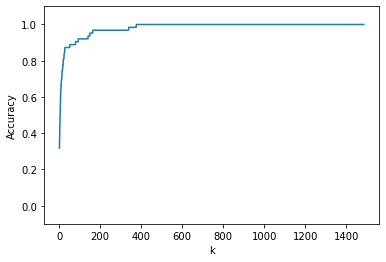

In [5]:
model, df = load_estimator(os.path.join('..', '..', 'experiments', 'merged_head_wo_quad', 'embedding'))
y_pred = predict_k(model, df, X_test, k=len(df), metric='euclidean', predict_new=False)
evaluate(y_pred, y_test, accuracy_curve=True)

Accuracy:  0.49206349206349204 
mAcc@5:  0.7619047619047619 
MAP@5:  0.5904761904761905 
F1:  0.3371647509578544 
New:  0
AUC:  0.9917857676942469


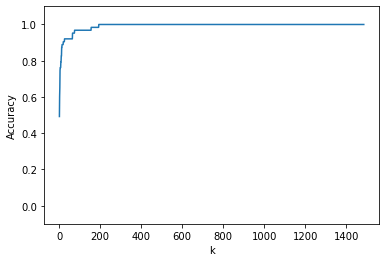

In [6]:
model, df = load_estimator(os.path.join('..', '..', 'experiments', 'merged_head', 'embedding'))
y_pred = predict_k(model, df, X_test, k=len(df), metric='euclidean', predict_new=False)
evaluate(y_pred, y_test, accuracy_curve=True)

